In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import plotly.express as px
import os


In [2]:

# dirdata="/Users/risser/Taff/2025_stages/stage XIA Météo/codes/titan_1_jour/"
dirdata = "/home/luana/Bureau/scratch/shared/Titan/data_laurent/2023-01-0/2023-01-01_03h00"

subdirdata=glob.glob(dirdata+"*")
subdirdata.sort()

print("Possible time frames:", subdirdata)

possible_channels = [os.path.basename(x) for x in glob.glob(subdirdata[0]+"/*")]
possible_channels.sort()

print("\nPossible channels:")
for i in range(len(possible_channels)):
    print(i,":",possible_channels[i])


Possible time frames: ['/home/luana/Bureau/scratch/shared/Titan/data_laurent/2023-01-0/2023-01-01_03h00']

Possible channels:
0 : aro_r2_2m.npy
1 : aro_t2m_2m.npy
2 : aro_t_250hpa.npy
3 : aro_t_500hpa.npy
4 : aro_t_700hpa.npy
5 : aro_t_850hpa.npy
6 : aro_tp_0m.npy
7 : aro_u10_10m.npy
8 : aro_u_250hpa.npy
9 : aro_u_500hpa.npy
10 : aro_u_700hpa.npy
11 : aro_u_850hpa.npy
12 : aro_v10_10m.npy
13 : aro_v_250hpa.npy
14 : aro_v_500hpa.npy
15 : aro_v_700hpa.npy
16 : aro_v_850hpa.npy
17 : aro_z_250hpa.npy
18 : aro_z_500hpa.npy
19 : aro_z_700hpa.npy
20 : aro_z_850hpa.npy
21 : arp_t_250hpa.npy
22 : arp_t_500hpa.npy
23 : arp_t_700hpa.npy
24 : arp_t_850hpa.npy
25 : arp_u_250hpa.npy
26 : arp_u_500hpa.npy
27 : arp_u_700hpa.npy
28 : arp_u_850hpa.npy
29 : arp_v_250hpa.npy
30 : arp_v_500hpa.npy
31 : arp_v_700hpa.npy
32 : arp_v_850hpa.npy
33 : arp_z_250hpa.npy
34 : arp_z_500hpa.npy
35 : arp_z_700hpa.npy
36 : arp_z_850hpa.npy


stacked_images shape: (1, 512, 640)
stacked_images min: 215.7679901123047
stacked_images max: 221.77215576171875


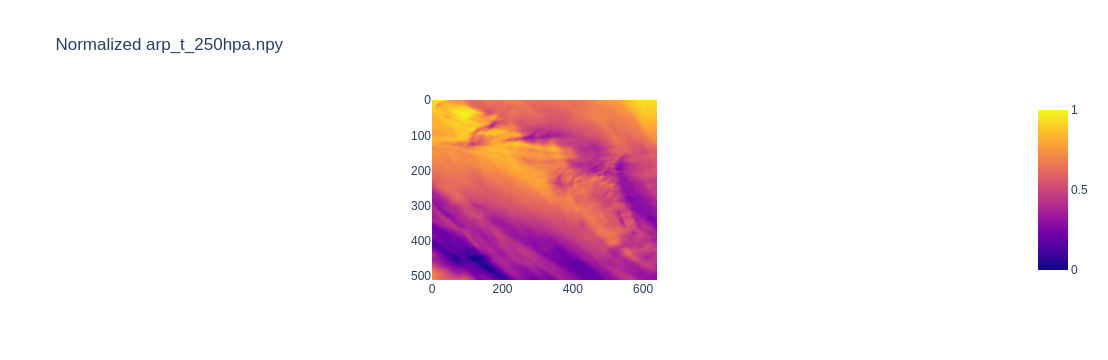

In [3]:
channel_of_interest=21

obs1=np.load(subdirdata[0]+"/"+possible_channels[channel_of_interest])

stacked_images=np.zeros([len(subdirdata),obs1.shape[0],obs1.shape[1]])

for i in range(len(subdirdata)):
    stacked_images[i,:,:]=np.load(subdirdata[i]+"/"+possible_channels[channel_of_interest])


print("stacked_images shape:",stacked_images.shape)
print("stacked_images min:",stacked_images.min())
print("stacked_images max:",stacked_images.max())

stacked_images.max()
#plt.matshow(stacked_images[0,:,:])
#plt.matshow(stacked_images[1,:,:])

fig = px.imshow((stacked_images-stacked_images.min())/(stacked_images.max()-stacked_images.min()), animation_frame=0,labels=dict(animation_frame="time frame"),title="Normalized "+possible_channels[channel_of_interest])
fig.show()

#plt.show()

In [8]:
%cd /home/luana/Bureau/meteo

/home/luana/Bureau/meteo


In [5]:
ls 

build_and_publish.sh*  examples/       pyproject.toml        runai_settings.sh
doc/                   LICENSE         README.md             tests/
Dockerfile             mfai/           requirements_dev.txt
Dockerfile.mf          mfai.egg-info/  requirements.txt


In [9]:
from mfai.mfai.torch.models import unetrpp

toto=unetrpp.UNetRPP(in_channels=1,out_channels=1,input_shape=[512, 640])

print(toto)


ModuleNotFoundError: No module named 'mfai.mfai'